In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

import Figure_H2H_Regret

In [2]:
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
grid = (3,3) # grid size
from Network import network_design
Network = network_design()
arcs,arc_index_mapping = Network._getArcs(grid)

num_test = 1000
lower = 0 # coef lower bound
upper = 1 # coef upper bound
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_nodes = grid[0]*grid[0]
coef_seed = 1

x_dist = 'uniform'
e_dist = 'normal'
x_low = -2
x_up = 2
x_mean = 2
x_var = 2
bump = 100

In [4]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
DataPath_Parent = project_directory + '/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_Size' + data_generation_process + f'/{grid[0]}by{grid[1]}_grid/'
pathlib.Path(DataPath_Parent).mkdir(parents=True, exist_ok=True)
print("DataPath_parent:", DataPath_Parent)
Result_dir = DataPath_Parent + "Result/"
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

DataPath_parent: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/


## Impact of model misspecification when N increase

In [5]:
num_feat = 5 # size of feature
p = num_feat
e = 0.5 # scale of normal std or the range of uniform. For the error term
alpha = e # scale of normal std or the range of uniform. For the error term
iteration_all = np.arange(0,100)
batch_size = 20
num_epochs = 1000
num_train_all = [100,300,500]
mu_all = [0.75]
lamb_all = [0.8]
deg_all = [1.0,2.0,4.0,8.0] # polynomial degree

In [6]:
deg_all = [12.0]

##### Data Generation

In [7]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"x_test_all.pkl"):
            print("Already Exist")
        else:
            x_test_all, c_test_all, x_train_all, c_train_all,noise_train_all,noise_test_all,W_star_all = \
            DS_Obj.Simulator(DataPath,lower, upper, p, d, coef_seed,iteration_all,num_test, num_train, alpha,mis,data_generation_process,x_dist, e_dist, x_low, x_up, x_mean, x_var, bump)
            Data_LSM.store_input_data(DataPath,x_test_all,c_test_all,x_train_all,c_train_all,noise_test_all,noise_train_all,W_star_all)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=500_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/


##### Run Oracle

In [8]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
            print("Results already exist")
        else:
            SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
Oracle: iter= 20 ,cost_Oracle_Ante= 18170719.273198586
Oracle: iter= 40 ,cost_Oracle_Ante= 6215443.112488868
Oracle: iter= 60 ,cost_Oracle_Ante= 8785448.328633292
Oracle: iter= 80 ,cost_Oracle_Ante= 20894399.71882818
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Oracle: iter= 20 ,cost_Oracle_Ante= 18041008.272043377
Oracle: iter= 40 ,cost_Oracle_Ante= 6978727.051081308
Oracle: iter= 60 ,cost_Oracle_Ante= 8307734.853664137
Oracle: iter= 80 ,cost_Oracle_Ante= 27624742.351554703
DataPath: /Use

##### Run OLS

In [9]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
            print("Results already exist")
        else:
            SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 21747225.90275271
OLS: iter= 40 ,cost_OLS_Ante= 8699679.094800778
OLS: iter= 60 ,cost_OLS_Ante= 12032783.566472057
OLS: iter= 80 ,cost_OLS_Ante= 23014595.87874238
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 25610409.428491965
OLS: iter= 40 ,cost_OLS_Ante= 9684320.689046826
OLS: iter= 60 ,cost_OLS_Ante= 12587753.110064974
OLS: iter= 80 ,cost_OLS_Ante= 38597118.43076065
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/

##### Run DDR

In [10]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 21747225.90275271
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 8699679.094800778
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 12032783.566472057
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 23014595.87874238
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 25610409.428491965
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 9684320.689046826
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 12587753.110064974
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_An

##### Run SPO+

In [11]:
for num_train in num_train_all:
    method_names = ["spo+"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 42906668.181040905
['spo+'] : iter= 40 ,cost_EPO_Ante= 34716557.80909604
['spo+'] : iter= 60 ,cost_EPO_Ante= 21763798.322128683
['spo+'] : iter= 80 ,cost_EPO_Ante= 29667860.168703727
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 22845899.851636283
['spo+'] : iter= 40 ,cost_EPO_Ante= 21968291.46015694
['spo+'] : iter= 60 ,cost_EPO_Ante= 12564741.621258637
['spo+'] : iter= 80 ,cost_EPO_Ante= 34461933.75704327
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep

##### Run PG

In [12]:
for num_train in num_train_all:
    method_names = ["pg"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_pg_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 56213510.820411615
['pg'] : iter= 40 ,cost_EPO_Ante= 45881107.72672202
['pg'] : iter= 60 ,cost_EPO_Ante= 30612470.136869825
['pg'] : iter= 80 ,cost_EPO_Ante= 38717880.05875552
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 28869029.54285892
['pg'] : iter= 40 ,cost_EPO_Ante= 13574446.868666707
['pg'] : iter= 60 ,cost_EPO_Ante= 13357681.983492881
['pg'] : iter= 80 ,cost_EPO_Ante= 40607411.25380515
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_S

##### Run LTR

In [13]:
for num_train in num_train_all:
    method_names = ["ltr"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_ltr_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 38701831.027774245
['ltr'] : iter= 40 ,cost_EPO_Ante= 23899175.708880268
['ltr'] : iter= 60 ,cost_EPO_Ante= 33007465.119217
['ltr'] : iter= 80 ,cost_EPO_Ante= 41957805.31423462
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 34052497.87173206
['ltr'] : iter= 40 ,cost_EPO_Ante= 21778156.89142482
['ltr'] : iter= 60 ,cost_EPO_Ante= 20475912.279114936
['ltr'] : iter= 80 ,cost_EPO_Ante= 43754985.94864426
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_D

### Comparison

In [14]:
def obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,benchmark):
    h2h_ = {}; cost_rd_ = {}; regret_rd_ = {}
    for num_train in num_train_all:
        for deg in deg_all:
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)     
            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
                cost_SPO_Ante_all = pickle.load(tf)
            # with open(DataPath+'cost_rf_Ante_all.pkl', "rb") as tf:
            #     cost_RF_Ante_all = pickle.load(tf)
            # with open(DataPath+'cost_xg_Ante_all.pkl', "rb") as tf:
                # cost_XG_Ante_all = pickle.load(tf)
            with open(DataPath+'cost_pg_Ante_all.pkl', "rb") as tf:
                cost_PG_Ante_all = pickle.load(tf)
            with open(DataPath+'cost_ltr_Ante_all.pkl', "rb") as tf:
                cost_LTR_Ante_all = pickle.load(tf)

            for mu in mu_all:
                for lamb in lamb_all:
                    if benchmark == "OLS":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
                    if benchmark == "SPO+":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
                    # if benchmark == "RF":
                    #     h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_RF_Ante_all,cost_Oracle_Ante_all)
                    # if benchmark == "XG":
                    #     h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_XG_Ante_all,cost_Oracle_Ante_all)
                    if benchmark == "PG":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_PG_Ante_all,cost_Oracle_Ante_all)
                    if benchmark == "LTR":
                        h2h_[num_train,deg,mu,lamb],regret_rd_[num_train,deg,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_LTR_Ante_all,cost_Oracle_Ante_all)
            print("num_train = ",num_train,",deg = ",deg)
    return h2h_,regret_rd_

### DDR vs SPO

In [25]:
h2h_ddr_vs_spo,regret_rd_ddr_vs_spo = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"SPO+")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  100 ,deg =  12.0
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  300 ,deg =  12.0
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=500_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  500 ,deg =  12.0


##### N = 500,deg = 1.0

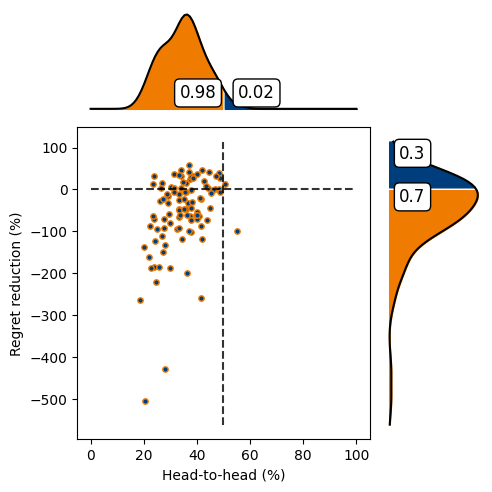

In [26]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_vs_SPO_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
all_x = h2h_ddr_vs_spo[num_train,deg,mu,lamb] * 100
all_y = regret_rd_ddr_vs_spo[num_train,deg,mu,lamb] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### N = 500,deg = 4.0

In [17]:
# num_train = 500
# deg = deg_all[2]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_SPO_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### N = 500,deg = 8.0

In [18]:
# num_train = 500
# deg = deg_all[3]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_SPO_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_spo[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

### DDR vs PG

In [27]:
h2h_ddr_vs_pg,regret_rd_ddr_vs_pg = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"PG")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  100 ,deg =  12.0
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  300 ,deg =  12.0
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=500_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  500 ,deg =  12.0


##### N = 500, deg = 8.0

In [32]:
file_name

'/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/Result/DDR_vs_PG_mu=0.75_lamb=0.8_N=500_deg=12.0'

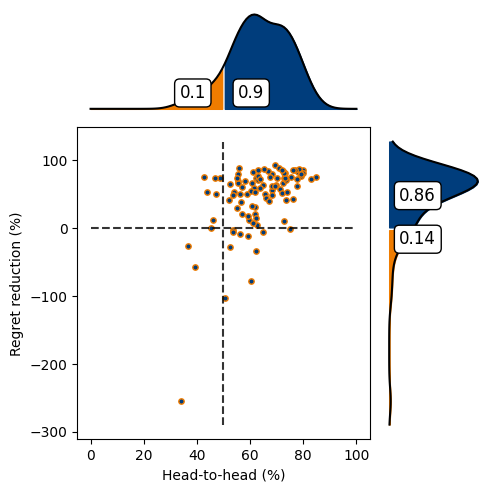

In [31]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_vs_PG_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
all_x = h2h_ddr_vs_pg[num_train,deg,mu,lamb] * 100
all_y = regret_rd_ddr_vs_pg[num_train,deg,mu,lamb] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

### DDR vs LTR

In [29]:
h2h_ddr_vs_ltr,regret_rd_ddr_vs_ltr = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"LTR")

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=100_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  100 ,deg =  12.0
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=300_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  300 ,deg =  12.0
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Rep/Model_Mis_Data_SizeSPO_Data_Generation/3by3_grid/data_size=500_deg=12.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  500 ,deg =  12.0


##### N = 500, deg = 8.0

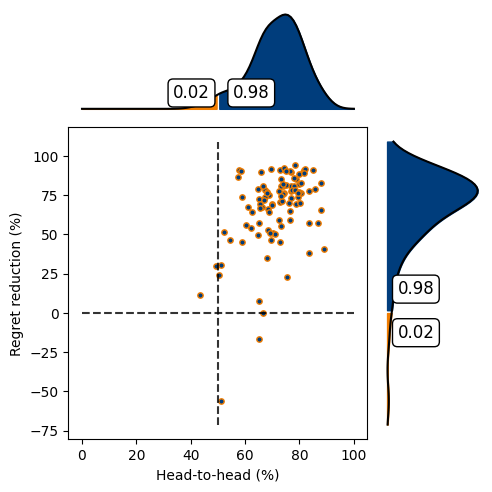

In [30]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_vs_LTR_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
all_x = h2h_ddr_vs_ltr[num_train,deg,mu,lamb] * 100
all_y = regret_rd_ddr_vs_ltr[num_train,deg,mu,lamb] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

### DDR vs OLS

In [23]:
# h2h_ddr_vs_ols,regret_rd_ddr_vs_ols = obtain_DDR_vs_benchmarks_h2h_regret(DataPath_Parent,num_train_all,deg_all,e,num_test,x_dist,e_dist,mu_all,lamb_all,"OLS")

##### N = 500, deg = 8.0

In [24]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_OLS_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# all_x = h2h_ddr_vs_ols[num_train,deg,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_ols[num_train,deg,mu,lamb] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)